# Homework 1
<strong>
Pattern recognition </br></br>
Teacher: Dr. Yazdian </br></br>
Amirmohammad Taghizadehgan 40104244</br></br>
امیرمحمد تقی‌زاده‌گان ۴۰۱۴۰۴۲۴۴
</strong>

# importing libraries

In [1]:
import numpy as np
import pandas as pd

# Exercise 1

## a)

In [2]:

def bayes_decision_rule(cost_matrix, likelihood, prior):

    # r1 = cost11 * p(c1) * p(x | c1) + cost12 * p(c2) * p(x | c2) + ...
    # lecture3-slide 18
    expected_losses = (prior * likelihood) @ cost_matrix
    
    # Find the class with the minimum expected loss
    min_expected_loss_class = np.argmin(expected_losses, axis = 1)
    
    return min_expected_loss_class


## b)

MAP(Maximum a posteriori) => when we have 0 cost for guessing the correct class, and (prior * likelihood) cost when we guess the wrong class. This way the maximum posterior(minimum risk with such parameters) will be assigned.
So the $\lambda$ for a 4 class problem will look like:
$$
\begin{pmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0 \\
\end{pmatrix}
$$


ML(Maximum Likelihood) => we want to ignore our priors, so we set them equal to ignore their effect. so the $\lambda$ will be the same as above but the priors should be the same.

# Exercise 2

## loading the dataset

In [3]:
column_names = ['age', 'year', 'nodes', 'survival_status']
haberman_df = pd.read_csv('Datasets/Binary/haberman/haberman.data', names=column_names)
haberman_df

,age,year,nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
classes = haberman_df['survival_status'].unique()
classes

array([1, 2])

In [5]:
def prior(y):
    classes = np.unique(y)
    result = np.zeros_like(classes, dtype= np.float64) # the size of prior = 1 * len(classes)
    for i in range(len(classes)):
        result[i] = (y == classes[i]).sum(axis=None)/len(y) # each class count / total_count
    return result

In [6]:
def likelihood(x, y):
    # assuming gaussian distribution for all the features.
    x = np.array(x)
    y = np.array(y)
    classes = np.unique(y)
    result = np.zeros((x.shape[0],len(classes)), dtype= np.float64)
    for i in range(len(classes)):
        class_id = y == classes[i] # given class[i]
        mu = np.mean(x[class_id, :], axis = 0) # mean
        cov = np.cov(x[class_id].T) # cov for multi class gaussian
        for j in np.arange(x.shape[0]):
            # Gaussian formula from the guide slides:
            result[j, i] = (1/((2 * np.pi) ** (len(classes)/2) * np.linalg.det(cov) ** .5)) *\
                np.exp(-.5 * (x[j, :] - mu).T @ np.linalg.inv(cov) @ (x[j, :] - mu))
    return result

In [7]:
# it calculates likelihood exactly like the above piece of code, but for new samples.
def likelihood_newsamples(newsamples ,x, y):
    newsamples = np.array(newsamples)
    x = np.array(x)
    y = np.array(y)
    classes = np.unique(y)
    result = np.zeros((newsamples.shape[0],len(classes)), dtype= np.float64)
    for i in range(len(classes)):
        class_id = y == classes[i]
        mu = np.mean(x[class_id, :], axis = 0)
        cov = np.cov(x[class_id].T)
        for j in np.arange(newsamples.shape[0]):
            result[j, i] = (1/((2 * np.pi) ** (len(classes)/2) * np.linalg.det(cov) ** .5)) *\
                np.exp(-.5 * (newsamples[j, :] - mu).T @ np.linalg.inv(cov) @ (newsamples[j, :] - mu))
    return result

In [8]:
# creates confusion matrix.
def confusionBuild(predict, y):
    labels = np.unique(y)
    mat = np.zeros((labels.shape[0], labels.shape[0]))
    for i in range(len(labels)):
        for j in range(len(labels)):
            mat[i, j] = sum(np.logical_and(y == labels[i], predict == labels[j]))
    return mat

# gets accuracy out of confusion matrix.
def conf2acc(confusionMat):  
    return np.sum(confusionMat * np.eye(confusionMat.shape[0]), axis = None)/np.sum(confusionMat, axis = None)

## bayes risk classifier for binary problem

In [9]:
cost_matrix = np.array([[0,2],[1,0]])
likelihood_p = likelihood(haberman_df.iloc[:, :-1], haberman_df.iloc[:, -1]) 
prior_p = prior(haberman_df.iloc[:, -1])
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m1 = confusionBuild(result, haberman_df.iloc[:, -1].to_numpy())
print(confusion_m1)
print(f'Averaged accuracy is: {conf2acc(confusion_m1): .4f}')
for i in np.arange(classes.shape[0]):
    acc = confusion_m1[i, i] / confusion_m1[i, :].sum()
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')

[[216.   9.]
 [ 68.  13.]]
Averaged accuracy is:  0.7484
Class1 accuracy is: 0.9600
Class2 accuracy is: 0.1605


## MAP classifier for binary problem

In [10]:
cost_matrix = [[0,1],[1,0]] # equal costs
likelihood_p = likelihood(haberman_df.iloc[:, :-1], haberman_df.iloc[:, -1]) 
prior_p = prior(haberman_df.iloc[:, -1])
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m2 = confusionBuild(result, haberman_df.iloc[:, -1].to_numpy())
print(confusion_m2)
print(f'Averaged accuracy is: {conf2acc(confusion_m2): .4f}')
for i in np.arange(classes.shape[0]):
    acc = confusion_m2[i, i] / confusion_m2[i, :].sum()
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')

[[215.  10.]
 [ 63.  18.]]
Averaged accuracy is:  0.7614
Class1 accuracy is: 0.9556
Class2 accuracy is: 0.2222


# ML classifier for binary problem

In [11]:
cost_matrix = [[0,1],[1,0]] # equal costs
likelihood_p = likelihood(haberman_df.iloc[:, :-1], haberman_df.iloc[:, -1]) 
prior_p = np.ones_like(classes) / len(classes) # equal priors
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m3 = confusionBuild(result, haberman_df.iloc[:, -1].to_numpy())
print(confusion_m3)
print(f'Averaged accuracy is: {conf2acc(confusion_m3): .4f}')
for i in np.arange(classes.shape[0]):
    acc = confusion_m3[i, i] / confusion_m3[i, :].sum()
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')

[[195.  30.]
 [ 48.  33.]]
Averaged accuracy is:  0.7451
Class1 accuracy is: 0.8667
Class2 accuracy is: 0.4074


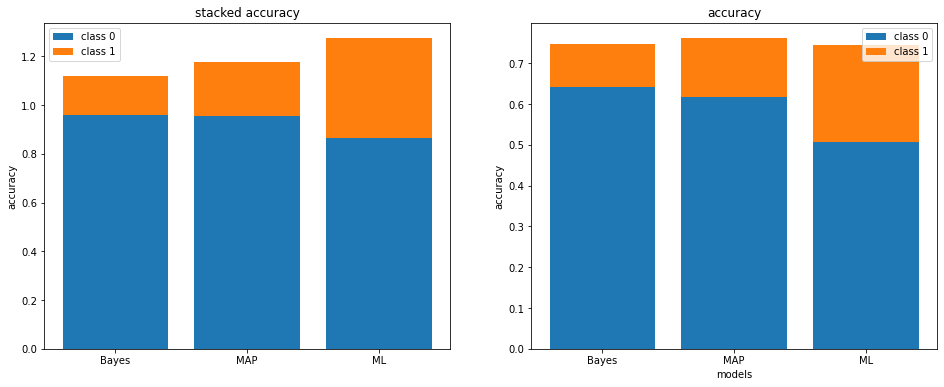

In [12]:
import matplotlib.pyplot as plt

# accuracy mat:
# [[acc_class1_bayes, acc_class1_map, acc_class1_ml],
#  [acc_class2_bayes, acc_class2_map, acc_class2_ml]]
acc = np.zeros((len(classes), 3), 'float')
for j in range(3):
    temp = eval(f'confusion_m{j+1}')
    for i in range(classes.size):
        acc[i, j] = temp[i, i] / temp[i, :].sum()


ave_acc = np.zeros((1, 3), 'float')
for j in range(3):
    temp = eval(f'confusion_m{j+1}')
    ave_acc[0, j] = conf2acc(temp)

x = ['Bayes', 'MAP', 'ML']
plt.figure(figsize=(16, 6))
plt.subplot(121)
for i in range(classes.size):
    plt.bar(x, acc[i, :], bottom = acc[:i, :].sum(0), label = f'class {i}')
plt.ylabel('accuracy')
plt.legend()
plt.title('stacked accuracy')

plt.subplot(122)

for i in range(classes.size):
    plt.bar(x, ave_acc[0, :] * acc[i, :]/acc.sum(0), bottom=(ave_acc[0, :] * acc[:i, :]/acc.sum(0)).sum(0), label = f'class {i}')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')

plt.show()

## c)

since our priors didn't preserve reallity, ML predicts better for each class. on the other hand, regarding to bayes risk classifier, we are raising sensitivity. because the cost of choosing class2 is basically more than class1.

# Excersise 3

In [13]:
multi_df = pd.read_csv('Datasets/Multi/Data_User_Modeling_Dataset.csv', header = None)
multi_df.head()

,0,1,2,3,4,5
0,0.08,0.08,0.10,0.24,0.90,1
1,0.06,0.06,0.05,0.25,0.33,2
2,0.10,0.10,0.15,0.65,0.30,3
3,0.08,0.08,0.08,0.98,0.24,2
4,0.09,0.15,0.40,0.10,0.66,3


## MAP

In [23]:
classes = multi_df.iloc[:, -1].unique()
cost_matrix = np.ones((len(classes), len(classes))) - np.eye(len(classes))
likelihood_p = likelihood(multi_df.iloc[:, :-1], multi_df.iloc[:, -1]) 
prior_p = prior(multi_df.iloc[:, -1])
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m1 = confusionBuild(result, multi_df.iloc[:, -1].to_numpy())
print(f'Averaged accuracy is: {conf2acc(confusion_m1): .4f}')
accuracy = []
for i in np.arange(classes.shape[0]):
    acc = confusion_m1[i, i] / confusion_m1[i, :].sum()
    accuracy.append(acc)
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')
print(f'unweighted accuracy average is:{sum(accuracy)/len(classes):.4f}')

Averaged accuracy is:  0.9650
Class1 accuracy is: 0.9841
Class2 accuracy is: 0.9880
Class3 accuracy is: 0.9432
Class4 accuracy is: 0.9130
unweighted accuracy average is:0.9571


## ML

In [15]:
classes = multi_df.iloc[:, -1].unique()
cost_matrix = np.ones((len(classes), len(classes))) - np.eye(len(classes))
likelihood_p = likelihood(multi_df.iloc[:, :-1], multi_df.iloc[:, -1]) 
prior_p = np.ones_like(classes) / len(classes)
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m2 = confusionBuild(result, multi_df.iloc[:, -1].to_numpy())
print(f'Averaged accuracy is: {conf2acc(confusion_m2): .4f}')
accuracy = []
for i in np.arange(classes.shape[0]):
    acc = confusion_m2[i, i] / confusion_m2[i, :].sum()
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')
    accuracy.append(acc)
print(f'unweighted accuracy average is:{sum(accuracy)/len(classes):.4f}')    


Averaged accuracy is:  0.9533
Class1 accuracy is: 0.9841
Class2 accuracy is: 0.9398
Class3 accuracy is: 0.9432
Class4 accuracy is: 0.9565
unweighted accuracy average is:0.9559


## c)

unlike last time, our data have a better representation of real world. so MAP results better than ML and we can also see MAP superiority in:</br>
average accuracy > unweighted average accuracy

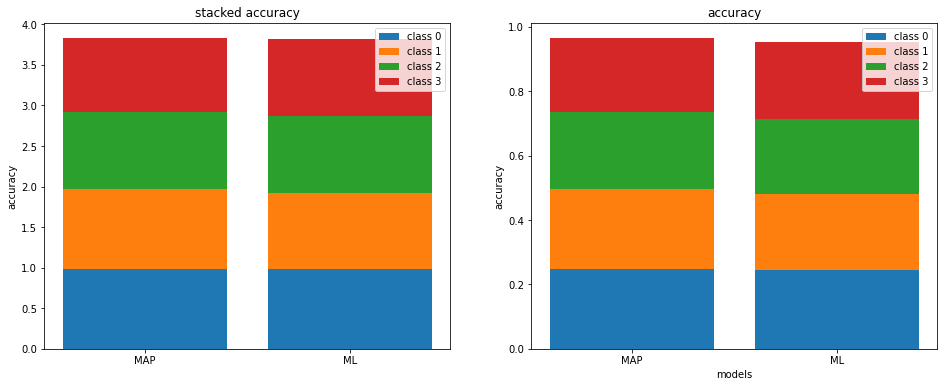

In [16]:
import matplotlib.pyplot as plt

# accuracy mat:
# [[acc_class1_map, acc_class1_ml],
#  [acc_class2_map, acc_class2_ml]
#   ...]
acc = np.zeros((len(classes), 2), 'float')
for j in range(2):
    temp = eval(f'confusion_m{j+1}')
    for i in range(classes.size):
        acc[i, j] = temp[i, i] / temp[i, :].sum()


ave_acc = np.zeros((1, 2), 'float')
for j in range(2):
    temp = eval(f'confusion_m{j+1}')
    ave_acc[0, j] = conf2acc(temp)

x = ['MAP', 'ML']
plt.figure(figsize=(16, 6))
plt.subplot(121)
for i in range(classes.size):
    plt.bar(x, acc[i, :], bottom = acc[:i, :].sum(0), label = f'class {i}')
plt.ylabel('accuracy')
plt.legend()
plt.title('stacked accuracy')

plt.subplot(122)

for i in range(classes.size):
    plt.bar(x, ave_acc[0, :] * acc[i, :]/acc.sum(0), bottom=(ave_acc[0, :] * acc[:i, :]/acc.sum(0)).sum(0), label = f'class {i}')
plt.xlabel('models')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy')

plt.show()

# Exercise 4

## a)

### for exercise 2

In [17]:
x = haberman_df.iloc[:, :-1].to_numpy()
cov = np.cov(x.T)
np.linalg.det(cov)

62938.31512229396

|cov| >> 0 --> x is not singular 

### for exercise 3

In [18]:
x = multi_df.iloc[:, :-1].to_numpy()
cov = np.cov(x.T)
np.linalg.det(cov)

3.7136856502254336e-07

|cov| ~= 0 --> it can be singular but we have to check one more thing: 

In [19]:
x = multi_df.iloc[:, :-1].to_numpy()
cov = np.cov(100 * x.T)
np.linalg.det(cov)

37136856502254.305

--> the <big><b>covariance is not singular</b></big>. but we have to calculate with high precisions. or we can multiply all the columns in a big number like 100 in this example.

## b)
The problem is that one or more features are linearly dependent.

## c)
1- finding dependent features and removing one from table. 2- Or we can add some non-linearity to one of the features and keep them as a new variable.

## [optional]

lets say they are dependent:

In [20]:
classes = multi_df.iloc[:, -1].unique()
y = multi_df.iloc[:, -1].to_numpy()
columns = []
for j in np.arange(classes.size):
    for i in np.arange(j+1, classes.size):
        cov = np.cov(x[:, [i, j]].T)
        if np.linalg.det(cov) < 0.002:
            columns.append(i)


new_multi_df = multi_df.drop(columns=columns)
x = new_multi_df.iloc[:, :-1].to_numpy()

cov = np.cov(x.T)
np.linalg.det(cov)


8.78761468034263e-06

### MAP

In [21]:
classes = new_multi_df.iloc[:, -1].unique()
cost_matrix = np.ones((len(classes), len(classes))) - np.eye(len(classes))
likelihood_p = likelihood(new_multi_df.iloc[:, :-1], new_multi_df.iloc[:, -1]) 
prior_p = prior(new_multi_df.iloc[:, -1])
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m1 = confusionBuild(result, new_multi_df.iloc[:, -1].to_numpy())
print(f'Averaged accuracy is: {conf2acc(confusion_m1): .4f}')
accuracy = []
for i in np.arange(classes.shape[0]):
    acc = confusion_m1[i, i] / confusion_m1[i, :].sum()
    accuracy.append(acc)
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')
print(f'unweighted accuracy average is:{sum(accuracy)/len(classes):.4f}')


Averaged accuracy is:  0.9572
Class1 accuracy is: 0.9841
Class2 accuracy is: 0.9759
Class3 accuracy is: 0.9318
Class4 accuracy is: 0.9130
unweighted accuracy average is:0.9512


### ML

In [22]:
classes = new_multi_df.iloc[:, -1].unique()
cost_matrix = np.ones((len(classes), len(classes))) - np.eye(len(classes))
likelihood_p = likelihood(new_multi_df.iloc[:, :-1], new_multi_df.iloc[:, -1]) 
prior_p = np.ones_like(classes) / len(classes)
result = classes[bayes_decision_rule(cost_matrix,likelihood_p,prior_p)]
confusion_m2 = confusionBuild(result, new_multi_df.iloc[:, -1].to_numpy())
print(f'Averaged accuracy is: {conf2acc(confusion_m2): .4f}')
accuracy = []
for i in np.arange(classes.shape[0]):
    acc = confusion_m2[i, i] / confusion_m2[i, :].sum()
    print(f'Class{classes[i]} accuracy is: {acc:.4f}')
    accuracy.append(acc)
print(f'unweighted accuracy average is:{sum(accuracy)/len(classes):.4f}')    

Averaged accuracy is:  0.9416
Class1 accuracy is: 0.9841
Class2 accuracy is: 0.9277
Class3 accuracy is: 0.9318
Class4 accuracy is: 0.9130
unweighted accuracy average is:0.9392
